# Chapter 9: A Boundry Approach: Support Vector Machines

## 9.1. Motivation

* centered around lines separating one class from another

* the Pima diabetes dataset is used to predict whether or not a patint will get a disease

* below the plot from the textbook shows just 2 of the features plotted against eachother (since our end goal in SVM is this): body mass vs. glucose with triangles for diabetics and pluses for non-diabetics

  * it does look as if pluses are further to the lower left, while triangles are farther up and to the right

figure 10-1 textbook

* now, note that when we predict the class (diabetic or not) using BMI (b) and glucose (g) we plug the linear model into the logistic function as below:

eqn 10-1

* and in order for this to be greater than 0.5 (diabetic) then the equality below must be true...


eqn 10-2

* which is equivalent to:

eqn 10-3

* so, the boundary line betweeen Y=1 and Y=0 (corresponding to 0.5 probability) is:

eqn 10-4

* this line is superimposed onto the plot below:

figure 10-2 textbook

* quite a few are still on the worng side of the line, but we are only using 2 features right now




### 9.1.1. Lines, Planes, Hyperplanes (LPH)

* if we have 2 features:

ap1 + bp2 =p3

we have a line,

* if we have 3 features:

ap1 + bp2 + cp3 = p4

we have a plane (such as below)


figure 10-3 textbook

* and more and we have ***hyperplanes***.


### 9.1.2. Why not a Boundary Curve Instead of a Line?



* we could view this as a degree 2 polynomial 

* for example the linear model on the population level is as below (with population values beta_i and sample estimates beta-hat_i)


eqn 10-7

* so our degree 2 polynomial model would be as below:

eqn 10-8

* say we fit a degree 2 model and then plot the points estimated close to 0.5 in red


figure 10-4 textbook


* in our new model (depending on the beta coefficients), we may have a straight line, an ellipse, or a parabola!

* increasing the degree would increase variance and decrease bias and we may overfit.

  * eg. in the plot below (degree = 5) the red doesnt seem to fit into the curve anymore

figure 10-5 textbook

* remember the boundary shown is a curve in p=2 features, but since the p is actually 5 (eg. including g^2, b^2 and gb) so we would have hyperplanes


## 9.2. SVM Basics


* since the central idea of SVM is to estimate the boundaries between classes we will stick with 2 classes here (and know that multiclass uses OVA or AVA methods)



### 9.2.1. Vector Notation

* it is cutomary to write the LPH coefficient vector **(c1,c2,c3,c4)** as

**w = (c1,c2,c3), w0 = -c4**


### 9.2.2. Optimizing Critereon

* note the lm method uses a different loss function so our resulting values will be different

* instead of minimizing a sum of squares we maximize a distance called a *margin*

  * the margin uses those points which lie closest to the line in either class

    * eg. the larger the larger separation of the classes

#### 9.2.3. IRIS data example

* flower classification dataset (highly used)

* try to distinguish setosa, versicolor, and virginica

* we will start by separating two classes (which are actually separable) by petal length and sepal length

In [0]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl
from sklearn import svm

iris = load_iris()
X = pd.DataFrame(iris.data[:, [0]+[2]])
y = pd.DataFrame(iris.target)

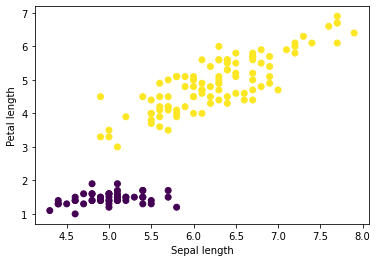

In [0]:
y.iloc[y.index[y[0] != 0]] = 1
X = pd.DataFrame(iris.data[:, [0]+[2]])

plt.figure()
plt.clf()

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Petal length')

plt.show()

* the data is clearly linearly separable

* in fact we could use many different lines

* which ones?....

### 9.2.4. Geometric Look: Convex Hulls

* convex hull can be used to demonstrate the mathematics behind this

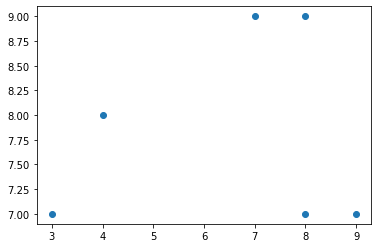

In [0]:
A = pd.DataFrame(np.random.randint(10, size=(6, 2)))
plt.scatter(A.iloc[:,0], y=A.iloc[:,1])
plt.show()

* the idea is that we are wrapping a string around the points 

* some points will be touching some inside

* convex hulls can be generated in any dimension (so for any number of features p)

* lets try using sciPy

   0  1
3  9  7
0  3  7
   0  1
4  8  9
3  9  7
   0  1
2  4  8
0  3  7
   0  1
5  7  9
4  8  9
   0  1
5  7  9
2  4  8


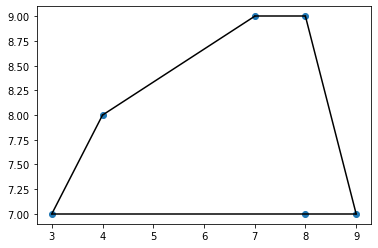

In [0]:
hull = ConvexHull(A)
plt.scatter(A.iloc[:,0], y=A.iloc[:,1])

for simplex in hull.simplices:   
  print(A.iloc[simplex, :])
  plt.plot(A.iloc[simplex, 0], A.iloc[simplex, 1], 'k-')

plt.show()

* the points that connect each line are stored in the **simplex** (these are the ***extreme*** points)

* now lets do it with IRIS

In [0]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import matplotlib.pyplot as plt    

iris = load_iris()
X = pd.DataFrame(iris.data[:, [0]+[2]])
y = pd.DataFrame(iris.target)
y.iloc[y.index[y[0] != 0]] = 1 # not setos all 1

* separate in 2 classes

In [0]:
inds=y.iloc[y.index[y[0] != 0]].index.tolist()
non_setos = pd.DataFrame(X.iloc[inds, :])

inds=y.iloc[y.index[y[0] == 0]].index.tolist()
setos = pd.DataFrame(X.iloc[inds, :])

* sciPy function to find Convex Hulls is used on each class and then we plot the lines in the simplex attribute

  * this attribute holds the outer points of each class and end points of the lines connecting

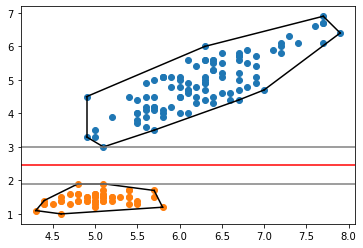

In [0]:
hull = ConvexHull(non_setos)
plt.scatter(non_setos.iloc[:,0], y=non_setos.iloc[:,1])

for simplex in hull.simplices:   
  plt.plot(non_setos.iloc[simplex, 0], non_setos.iloc[simplex, 1], 'k-')

hull = ConvexHull(setos)
plt.scatter(setos.iloc[:,0], y=setos.iloc[:,1])

for simplex in hull.simplices:   
  plt.plot(setos.iloc[simplex, 0], setos.iloc[simplex, 1], 'k-')

plt.axhline([1.9], color="gray")
plt.axhline([3], color="gray")
plt.axhline([2.45], color="red")
plt.show()

* by inspection we can see that the closest points between group is 5.1,1.9 and 5.1,3.0 and 4.8,1.9 and 5.1,3.0 (support vectors) 

  * margins have been added in grey while boundary line is in red

  * if any point is removed the boundary will not change


* the SVM line is the perpindicular bisector of the shortest line between the two: 1.9 + 0.55 = 2.45 (just ***happens*** to be horizontal)


* note that we would normally used all of the features

## 9.3. Sample vs. Population

* keep in mind that our data represents a sample from  a population 

* there is variance between samples

## 9.5. Linear Separabiltiy

* ***hard margin*** only exists when there is some clean separation of the data classes

* even in IRIS no line separates the versicolor and virginia

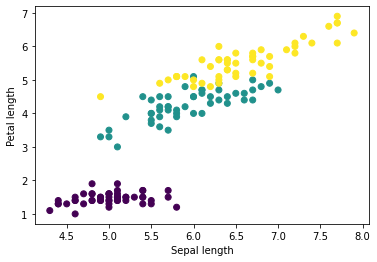

In [0]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl
from sklearn import svm

iris = load_iris()
X = pd.DataFrame(iris.data[:, [0]+[2]])
y = pd.DataFrame(iris.target)

plt.figure()
plt.clf()

plt.xlabel('Sepal length')
plt.ylabel('Petal length')

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y)
plt.show()

* Two solutions are 

  * ***soft margin***: we allow exceptions to the goal of having a clean line separate the classes. 
  
    * we still maximize the the separation distance ***but now we allow some points to lie within the margin and impose a penalty for each***

  * ***kernel***: transform using polynomial as before and apply LPH separator on new data

* typically we will need a combo of the 2

## 9.6. Soft Margin

 * we define a cost C that is used to define how strict we are about the separation

* SVM will find a boundary line subject to cost less than C

### 9.6.1. Loss Criterion and View as Regularization

* X_i is our row (data point) with corresponding Y_i

* then we want to find the largest possible margin subject to the constraint that 

        |w_0 + w| >= 1 

for all points in training set

  * (where Y = +1 for class 1 and Y = -1 for class 2 and omega is our coefficient vector) since typically svm theorists use this notation instead of 0/1


* if this quantity (without the absolute value around it) is positive we have class +1 and if negative class -1 

  * but if the magnitude is less than one we are less confident in our classification


* we minimize the terms in the equation below (the ***hinge loss***)

  * meaning we incur a small loss when the magnitude is between 0 and 1

  * we incur a higher loss when the incorrect class is predicted

* we also minimize a lamda term (see textbook) which penalizes higher coefficent values (reducing variance and increasing bias)


eqn 10.15





## 9.7. Applying a "Kernel"

*transforming the data (as we did with polynomials) is another method 

### 9.7.1. Navigating between original and transformed spaces

In [0]:
import numpy as np
import pandas as pd
z = pd.DataFrame(np.random.rand(500,3))
inds=(abs(z.iloc[:,1]**2 + z.iloc[:,0]**2)) > .4
inds2=(abs(z.iloc[:,1]**2 + z.iloc[:,0]**2)) < .2

inds=inds.index[inds == True].tolist()
inds2=inds2.index[inds2 == True].tolist()

plus1 = z.iloc[inds,:]
minus1 = z.iloc[inds2,:]

plus1 = plus1.reset_index(drop=True)
minus1 = minus1.reset_index(drop=True)


plus1.iloc[:,2]= 1
minus1.iloc[:,2]= -1


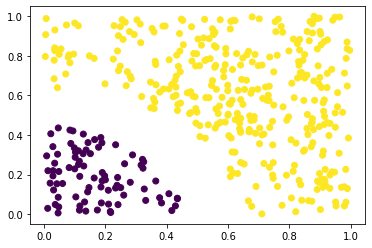

In [0]:
plus1=plus1.append(minus1)

import matplotlib.pyplot as plt
plt.figure()
# #plt.clf()

plt.scatter(plus1.iloc[:, 0], plus1.iloc[:, 1], c=plus1.iloc[:, 2])
plt.show()

* clearly the classes are separable by a quarter circle not a straight line


* so if we transform the data (replace it by its square)

  * now it is separable by a straight line as shown below

* this is what is usually done in svm

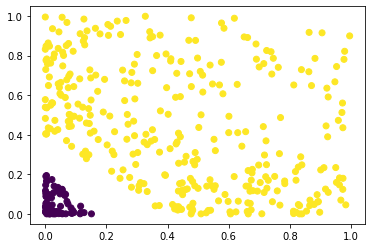

In [0]:
plus2=plus1.iloc[:,0:2]**2

import matplotlib.pyplot as plt
plt.figure()
# #plt.clf()

plt.scatter(plus2.iloc[:, 0], plus2.iloc[:, 1], c=plus1.iloc[:, 2])
plt.show()

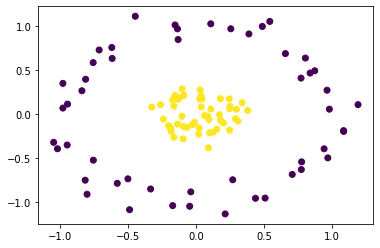

In [0]:
import numpy as np 
import sklearn 
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

X,y = make_circles(100, factor=0.2, noise=0.1) 

plt.scatter(X[:,0],X[:,1], c=y)
plt.show()

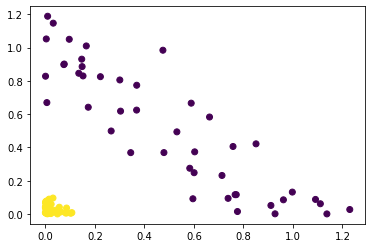

In [0]:
plus2=X[:,0:2]**2

import matplotlib.pyplot as plt
plt.figure()


plt.scatter(plus2[:, 0], plus2[:, 1], c=y)
plt.show()

### 9.7.2. Notation of a Kernel

* usually denoted by K(X_i,X_j) = X_i dot X_j

* important to be able to go back and forth

* polynomial and rbf common   

eqns 10.18,19


* each has a hyperparameter d and rbf has SD 

* rbf is more popular

### 9.7.3. Examples of Different SVM classifiers on Iris data (from [Sklearn](https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html#sphx-glr-auto-examples-svm-plot-iris-svc-py) )

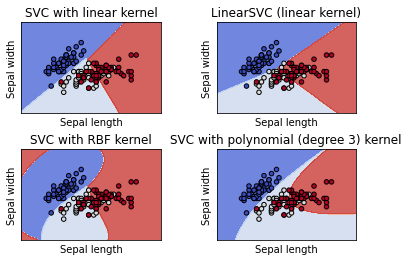

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out



iris = datasets.load_iris()
# Take the first two features
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter (usually start with .1 to 2)
models = (svm.SVC(kernel='linear', C=C), #uses regular hinge loss
          svm.LinearSVC(C=C, max_iter=10000), #uses squared hl
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
         svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

## 9.8. Choosing Kernel and Hyperparameters

* we can write a function to iterate through all the combos of hyperparameters (such as C and d as shown below)

* lets try on Iris data

### Example: Iris Data

In [0]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
import numpy as np


def fineTuningPoly(X_train, X_test, y_train, y_test, ds,Cs):

  for d in ds:
    for C in Cs:
      clf = svm.SVC(kernel='poly', degree=d, gamma='auto', C=C)
      model = clf.fit(X_train, y_train.ravel()) 

      y_pred = model.predict(X_test)
      #print('d:',d, 'C:',round(C,2), round(mean_absolute_error(y_pred, y_test),5))
      print('d:',d, 'C:',round(C,2), round(accuracy_score(y_pred, y_test),5))


def fineTuningRBF(X_train, X_test, y_train, y_test, Cs):

  for C in Cs:
    clf = svm.SVC(kernel='rbf', gamma=0.7, C=C)
    model = clf.fit(X_train, y_train.ravel()) 

    y_pred = model.predict(X_test)
    #print( 'C:',round(C,2), round(mean_absolute_error(y_pred, y_test),5))
    print('C:',round(C,2), round(accuracy_score(y_pred, y_test),5))

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

X = pd.DataFrame(iris.data)

X_train, X_test, y_train, y_test = train_test_split(X, iris.target, test_size=0.25)

ds = list(range(2,7))
Cs = np.arange(0.2, 2, 0.2).tolist()

fineTuningPoly(X_train, X_test, y_train, y_test, ds,Cs)

d: 2 C: 0.2 0.92105
d: 2 C: 0.4 0.89474
d: 2 C: 0.6 0.89474
d: 2 C: 0.8 0.89474
d: 2 C: 1.0 0.89474
d: 2 C: 1.2 0.89474
d: 2 C: 1.4 0.89474
d: 2 C: 1.6 0.92105
d: 2 C: 1.8 0.92105
d: 3 C: 0.2 0.92105
d: 3 C: 0.4 0.92105
d: 3 C: 0.6 0.92105
d: 3 C: 0.8 0.92105
d: 3 C: 1.0 0.92105
d: 3 C: 1.2 0.92105
d: 3 C: 1.4 0.92105
d: 3 C: 1.6 0.92105
d: 3 C: 1.8 0.92105
d: 4 C: 0.2 0.94737
d: 4 C: 0.4 0.94737
d: 4 C: 0.6 0.94737
d: 4 C: 0.8 0.94737
d: 4 C: 1.0 0.94737
d: 4 C: 1.2 0.94737
d: 4 C: 1.4 0.94737
d: 4 C: 1.6 0.94737
d: 4 C: 1.8 0.94737
d: 5 C: 0.2 0.92105
d: 5 C: 0.4 0.92105
d: 5 C: 0.6 0.92105
d: 5 C: 0.8 0.92105
d: 5 C: 1.0 0.92105
d: 5 C: 1.2 0.92105
d: 5 C: 1.4 0.92105
d: 5 C: 1.6 0.92105
d: 5 C: 1.8 0.92105
d: 6 C: 0.2 0.92105
d: 6 C: 0.4 0.92105
d: 6 C: 0.6 0.92105
d: 6 C: 0.8 0.92105
d: 6 C: 1.0 0.92105
d: 6 C: 1.2 0.92105
d: 6 C: 1.4 0.92105
d: 6 C: 1.6 0.92105
d: 6 C: 1.8 0.92105


* low degrees seemed better in previous tests so we will try a smaller range (but you never know exactly what will work)


* general rule of thumb for C is around .1 to around 2

In [0]:
fineTuningRBF(X_train, X_test, y_train, y_test,Cs)

C: 0.2 0.97333
C: 0.4 0.98667
C: 0.6 0.98667
C: 0.8 0.98667
C: 1.0 0.97333
C: 1.2 0.97333
C: 1.4 0.97333
C: 1.6 0.97333
C: 1.8 0.97333


### 9.8.2. Choice of Kernel

* depends on data

* probably gave similar answers since the terms of the exponential act like a polynomial and get very small

## 9.9. Example: TC Data

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import pandas as pd

my_path = '/content/drive/My Drive/ecs171_yancey/Lecture_Notes/Chapter_2/WA_Fn-UseC_-Telco-Customer-Churn.csv'

telco = pd.read_csv(my_path)
telco['TotalCharges'] = telco['TotalCharges'].apply(lambda x: pd.to_numeric(x, errors ='coerce'))
telco = telco.drop(['customerID'],axis=1)

tc = pd.get_dummies(telco, columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'], drop_first=True)

tc1 = tc.dropna()

X_train, X_test, y_train, y_test = train_test_split(tc1.iloc[:,0:31], tc1.loc[:,'Churn_Yes'], test_size=1000)

ds = list(range(2,5))
Cs = np.arange(0.2, 1, 0.2).tolist()

fineTuningPoly(X_train, X_test, y_train, y_test, ds,Cs)

d: 2 C: 0.2 1.0
d: 2 C: 0.4 1.0
d: 2 C: 0.6 1.0
d: 2 C: 0.8 1.0
d: 3 C: 0.2 1.0
d: 3 C: 0.4 1.0
d: 3 C: 0.6 1.0
d: 3 C: 0.8 1.0
d: 4 C: 0.2 1.0
d: 4 C: 0.4 1.0
d: 4 C: 0.6 1.0
d: 4 C: 0.8 1.0


*  slower due to having more rows

## 9.10. Fall Detection Data

* lets try categorical data

* remember we use all vs all

In [0]:
import pandas as pd

my_path = '/content/drive/My Drive/ecs171_yancey/Lecture_Notes/Chapter_7/falldetection.csv'

fd = pd.read_csv(my_path)
fd["ACTIVITY"] = fd["ACTIVITY"].astype('category')
X_train, X_test, y_train, y_test = train_test_split(fd.iloc[:,1:], fd.loc[:,'ACTIVITY'], test_size=1000)

ds = list(range(2,5))
Cs = np.arange(0.2, 1, 0.2).tolist()

fineTuningPoly(X_train, X_test, y_train, y_test, ds,Cs)

## 9.11. Kernel Trick

* remember how large our data can get when we polynomial transform a data set with many features such as forest cover with 54 (which would convert to 1311 for just degree 2)

* so we can avoid having to compute and store all of those columns by only storing the coefficient vector of the original 54 features instead of the 1311 elelemnts

* we do this by just storing the Kernel function K (as in 9.7.2.) to reduce complexity of finding the mapping function

* kernel function accepts inputs in the original lower dimensional space and returns the dot product of the transformed vectors in the higher dimensional space

## 9.12. Further Calculation Issues

* if kernel trick is not enough we still may need to use PCA or another dimension redution method

## 9.13. SVM Bias/Variance Tradeoff

* larger C reduces variance, increases bias (less choice for coefficients because they are smaller)


* larger d increases variance, reduces bias